# Анализ данных

Датасет состоит из пяти столбцов:

user_id — уникальный идентификатор пользователя;

timestamp — время посещения пользователем страницы;

group — группа эксперимента, к которой был случайно отнесён пользователь:
*   control — контрольная группа,
*   treatment — экспериментальная группа;

landing_page — версия лендинга, которую увидел пользователь:
*   old_page — старая версия страницы,
*   new_page — новая версия страницы;

converted — бинарный признак, показывающий, совершил ли пользователь целевое действие (целевым действием является регистрация на курс).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats

In [ ]:
df1 = pd.read_csv('data_ab.csv')
df1.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2025-01-21 22:11:48.556739,control,old_page,0
1,804228,2025-01-12 08:01:45.159739,control,old_page,0
2,661590,2025-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2025-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2025-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df1

,user_id,timestamp,group,landing_page,converted
0,851104,2025-01-21 22:11:48.556739,control,old_page,0
1,804228,2025-01-12 08:01:45.159739,control,old_page,0
2,661590,2025-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2025-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2025-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2025-01-03 22:28:38.630509,control,old_page,0
294474,945152,2025-01-12 00:51:57.078372,control,old_page,0
294475,734608,2025-01-22 11:45:03.439544,control,old_page,0
294476,697314,2025-01-15 01:20:28.957438,control,old_page,0


In [ ]:
df_c = df1[df1['group']== 'control']
df_c.shape

(147202, 5)

In [ ]:
df_c[df_c['landing_page'] == 'new_page'].shape

(1928, 5)

Среди контроольной группы было 1928 людей, которые видели новую версию сайта

In [ ]:
df_c[df_c['landing_page'] == 'old_page'].shape

(145274, 5)

И количество людей в контроольной группе которые видели старую версию - 145274

In [ ]:
df_t = df1[df1['group']== 'treatment']
df_t.shape

(147276, 5)

In [ ]:
df_t[df_t['landing_page'] == 'new_page'].shape

(145311, 5)

In [ ]:
df_t[df_t['landing_page'] == 'old_page'].shape

(1965, 5)

Примерно столько же неправильно страниц были показаны и для экспериментальной группе

In [ ]:
df1.sort_values(by='timestamp')

,user_id,timestamp,group,landing_page,converted
131228,922696,2025-01-02 13:42:05.378582,treatment,new_page,0
184884,781507,2025-01-02 13:42:15.234051,control,old_page,0
83878,737319,2025-01-02 13:42:21.786186,control,old_page,0
102717,818377,2025-01-02 13:42:26.640581,treatment,new_page,0
158789,725857,2025-01-02 13:42:27.851110,treatment,new_page,0
...,...,...,...,...,...
153305,851645,2025-01-24 13:41:18.869978,treatment,old_page,0
47535,808330,2025-01-24 13:41:19.152664,control,old_page,0
157787,843121,2025-01-24 13:41:44.097174,treatment,new_page,0
179072,836373,2025-01-24 13:41:52.604673,control,old_page,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


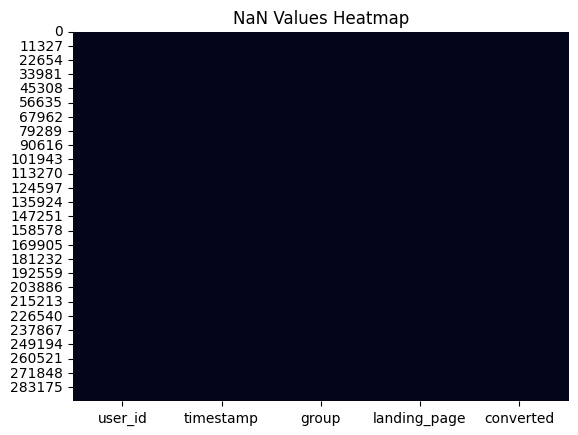

In [ ]:
sns.heatmap(df1.isna(), cbar=False)
plt.title('NaN Values Heatmap')
plt.show()

Славу богу, у нас нет пропусков

# Дубликаты

До этого в датасете мы обнаружили много дубликатов. Нам нужно их обработать. Сразу удалять все пропуски будет неэффективно, так как мы потеряем слишком много данных, около 8 тыс данных. Поэтому разберём несколько случаев

In [ ]:
df1[df1.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
22,767017,2025-01-12 22:58:14.991443,control,new_page,0
192,656468,2025-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2025-01-23 18:05:45.167335,control,old_page,1
240,733976,2025-01-11 15:11:16.407599,control,new_page,0
246,704650,2025-01-04 19:10:52.655062,treatment,new_page,0
...,...,...,...,...,...
294308,905197,2025-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2025-01-17 00:15:20.950723,control,old_page,0
294328,641570,2025-01-09 21:59:27.695711,control,old_page,0
294331,689637,2025-01-13 11:34:28.339532,control,new_page,0


In [ ]:
dubl  = df1[df1.duplicated('user_id', keep=False)]

In [ ]:
dubl.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2025-01-12 22:58:14.991443,control,new_page,0
192,656468,2025-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2025-01-23 18:05:45.167335,control,old_page,1
240,733976,2025-01-11 15:11:16.407599,control,new_page,0
246,704650,2025-01-04 19:10:52.655062,treatment,new_page,0


In [ ]:
dubl = dubl.sort_values('user_id')

In [ ]:
dubl.head()

,user_id,timestamp,group,landing_page,converted
213114,630052,2025-01-07 12:25:54.089486,treatment,old_page,1
230259,630052,2025-01-17 01:16:05.208766,treatment,new_page,0
251762,630126,2025-01-19 17:16:00.280440,treatment,new_page,0
22513,630126,2025-01-14 13:35:54.778695,treatment,old_page,0
11792,630137,2025-01-22 14:59:22.051308,control,new_page,0


In [ ]:
dubl = dubl.reset_index()

In [ ]:
dubl.head()

,index,user_id,timestamp,group,landing_page,converted
0,213114,630052,2025-01-07 12:25:54.089486,treatment,old_page,1
1,230259,630052,2025-01-17 01:16:05.208766,treatment,new_page,0
2,251762,630126,2025-01-19 17:16:00.280440,treatment,new_page,0
3,22513,630126,2025-01-14 13:35:54.778695,treatment,old_page,0
4,11792,630137,2025-01-22 14:59:22.051308,control,new_page,0


In [ ]:
del dubl['index']

In [ ]:
dubl.head()

,user_id,timestamp,group,landing_page,converted
0,630052,2025-01-07 12:25:54.089486,treatment,old_page,1
1,630052,2025-01-17 01:16:05.208766,treatment,new_page,0
2,630126,2025-01-19 17:16:00.280440,treatment,new_page,0
3,630126,2025-01-14 13:35:54.778695,treatment,old_page,0
4,630137,2025-01-22 14:59:22.051308,control,new_page,0


Какие ошибки могут быть из-за дубликатов:

---
Рассмотрим типы ошибок дубликатов, которые могли появиться



1. Дубликат Control - Treatment:
- Control: new_version && Treatment: old_version -> DELETE BOTH
- Control: old_version && Treatment: new_version -> KEEP BY MIN_TIME
- Control: old_version && Treatment: old_version -> IF CONTROL = MIN_TIME THEN KEEP CONTROL, ELSE DELETE BOTH
- Control: new_version && Treatment: new_version -> IF TREATMENT = MIN_TIME THEN KEEP TREATMENT, ELSE DELETE BOTH

2. Дубликат Treatment - Treatment:
- new_version && old_version -> DELETE OLD_VERSION IF NEW VERSION_TIME ==  MIN_TIME + KEEP NEW_VERSION, ELSE DELETE BOTH
- old_version && old_version -> DELETE BOTH
- new_version && new_version -> KEEP NEW_VERSION WITH MIN_TIME

3. Дубликат Control - Control:
- new_version && old_version -> DELETE NEW_VERSION IF OLD_VERSION_TIME == MIN_TIME + KEEP OLD_VERSION, ELSE DELETE BOTH
- old_version && old_version -> KEEP OLD_VERSION WITH MIN_TIME
- new_version && new_version -> DELETE BOTH

Проверим есть ли дубликаты user_id где id дублируется более 2 раз

In [ ]:
dubl_df = df1.sort_values(['user_id', 'timestamp']).reset_index(drop=True)
count = []
for user_id in dubl_df[dubl_df.duplicated('user_id', keep=False)]['user_id'].unique():
        user_data = df1[df1['user_id'] == user_id]
        count.append(len(user_data))

In [ ]:
x = 0
for i in range(len(count)):
  if count[i] > 2:
    print(f'Нашли user_id, где дубликатов больше 2')
    x += 1
print(x)

0


Таких случаев не нашли, значит в дальнейшей чистке дубликатов считаем, что каждый дублирующийся id встречается по 2 раза

In [ ]:
def process_duplicates_simple1(df):
    #сортируем для корректной обработки
    df = df1.copy()
    df = df.sort_values(['user_id', 'timestamp']).reset_index(drop=True)
    #индексы на удаление
    to_remove = []

    #обрабатываем каждого пользователя с дубликатами
    for user_id in df[df.duplicated('user_id', keep=False)]['user_id'].unique():
        user_data = df[df['user_id'] == user_id]

        if len(user_data) == 2:  #каждый id-дубликат встречается всего 2 раза
            idx1, idx2 = user_data.index[0], user_data.index[1]
            row1, row2 = user_data.iloc[0], user_data.iloc[1]

            #row1 раньше по времени!!!! row2 позже, тк сортировали массив
            #определяем тип дубликата
            combo = (row1['group'], row2['group'])

            #Control - Treatment | Treatment - Control
            if set(combo) == {'control', 'treatment'}:
                #определяем control и treatment
                if row1['group'] == 'control': #те в данном случае пользователь сначала был в контрольной группе
                    control, treatment = row1, row2
                    control_idx, treatment_idx = idx1, idx2
                else:
                    control, treatment = row2, row1
                    control_idx, treatment_idx = idx2, idx1
                #определяем версии
                control_version = control['landing_page']
                treatment_version = treatment['landing_page']
                #Control:new_version && Treatment: old_version -> DELETE BOTH
                if control_version == 'new_page' and treatment_version == 'old_page':
                    to_remove.extend([control_idx, treatment_idx])

                #Control: old_version && Treatment: new_version -> KEEP BY MIN_TIME
                elif control_version == 'old_page' and treatment_version == 'new_page':
                    if control['timestamp'] <= treatment['timestamp']:
                        #Оставляем control, удаляем treatment
                        to_remove.append(treatment_idx)
                    else:
                        # Оставляем treatment, удаляем control
                        to_remove.append(control_idx)

                #Control:old_version && Treatment:old_version !!!!!
                elif control_version == 'old_page' and treatment_version == 'old_page':
                    if control['timestamp'] <= treatment['timestamp']:
                        to_remove.append(treatment_idx)
                    else:
                        to_remove.extend([control_idx, treatment_idx])

                #Control: new_version && Treatment: new_version !!!!
                elif control_version == 'new_page' and treatment_version == 'new_page':
                    if treatment['timestamp'] <= control['timestamp']:
                        #оставляем treatment (он раньше), удаляем control
                        to_remove.append(control_idx)
                    else:
                        #оставляем control, удаляем treatment
                        to_remove.extend([control_idx, treatment_idx])

            #случай Treatment - Treatment
            elif combo == ('treatment', 'treatment'):
                version1, version2 = row1['landing_page'], row2['landing_page']
                if set([version1, version2]) == {'new_page', 'old_page'}: #те могут быть в любом порядке
                    if version1 == 'new_page':
                        new_row, old_row = row1, row2
                        new_idx, old_idx = idx1, idx2
                    else:
                        new_row, old_row = row2, row1
                        new_idx, old_idx = idx2, idx1
                    if new_row['timestamp'] <= old_row['timestamp']:
                        # NEW_VERSION_TIME == MIN_TIME, оставляем new, удаляем old
                        to_remove.append(old_idx)
                    else:
                        to_remove.extend([new_idx, old_idx])

                #old_version && old_version -> DELETE BOTH
                elif version1 == 'old_page' and version2 == 'old_page':
                    to_remove.extend([idx1, idx2])

                #new_version && new_version -> KEEP NEW_VERSION WITH MIN_TIME
                elif version1 == 'new_page' and version2 == 'new_page':
                    if row1['timestamp'] <= row2['timestamp']:
                        #row1 раньше, оставляем row1
                        to_remove.append(idx2)
                    else:
                        #row2 раньше, оставляем row2
                        to_remove.append(idx1)

            #случай Control - Control
            elif combo == ('control', 'control'):
                version1, version2 = row1['landing_page'], row2['landing_page']
                #new_version && old_version
                if set([version1, version2]) == {'new_page', 'old_page'}:
                    #определяем new и old, типо что из них произошло раньше
                    if version1 == 'old_page':
                        old_row, new_row = row1, row2
                        old_idx, new_idx = idx1, idx2
                    else:
                        old_row, new_row = row2, row1
                        old_idx, new_idx = idx2, idx1
                    #OLD_VERSION_TIME == MIN_TIME, оставляем old, удаляем new
                    if old_row['timestamp'] <= new_row['timestamp']:
                        to_remove.append(new_idx)
                    else: #DELETE BOTH
                        to_remove.extend([old_idx, new_idx])

                #old_version && old_version -> KEEP OLD_VERSION WITH MIN_TIME
                elif version1 == 'old_page' and version2 == 'old_page':
                    if row1['timestamp'] <= row2['timestamp']:
                        # row1 раньше, оставляем row1, удаляем row2
                        to_remove.append(idx2)
                    else:
                        # row2 раньше, оставляем row2, удаляем row1
                        to_remove.append(idx1)
                #new_version && new_version -> DELETE BOTH
                elif version1 == 'new_page' and version2 == 'new_page':
                    to_remove.extend([idx1, idx2])

    to_remove = list(set(to_remove))
    df_clean = df.drop(index=to_remove).reset_index(drop=True)
    return df_clean
res = process_duplicates_simple1(df1)

In [ ]:
res

,user_id,timestamp,group,landing_page,converted
0,630000,2025-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2025-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2025-01-19 19:20:56.438330,control,old_page,0
3,630003,2025-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2025-01-18 20:23:58.824994,treatment,new_page,0
...,...,...,...,...,...
288630,945994,2025-01-03 14:41:21.565258,control,old_page,0
288631,945996,2025-01-09 18:58:19.952277,treatment,new_page,0
288632,945997,2025-01-04 06:56:24.658147,control,old_page,0
288633,945998,2025-01-16 07:08:02.207969,control,old_page,0


Теперь проверим есть ли такие дубликаты, где:

Дубликат Control - Treatment: идея заключается в том, что человек мог увидеть обе версии  лендинга, сначала старую, а потом - новую. Хотелось бы узнать: изменилась ли конверсия для таких пользователей

save duplicates that look like: control: old_version, treatment: new_version && cotrol == min_time

В таком случае их можно было бы отдельно проанализировать и получить информацию, которая поможет получить итоговые выводы о результатат А/В теста

In [ ]:
# 1. фильтруем только нужные комбинации
ctrl = df1[(df1['group'] == 'control') & (df1['landing_page'] == 'old_version')]
trt  = df1[(df1['group'] == 'treatment') & (df1['landing_page'] == 'new_version')]

# 2. берём только тех user_id, которые есть в обеих выборках
ids = set(ctrl['user_id']) & set(trt['user_id'])

ctrl_keep = ctrl[ctrl['user_id'].isin(ids)]
trt_keep  = trt[trt['user_id'].isin(ids)]

# 3. объединяем обратно в один датасет
result = pd.concat([ctrl_keep, trt_keep], ignore_index=True)
result

,user_id,timestamp,group,landing_page,converted


Таких дубликатов не найдено.

# Поиск зависимостей

In [ ]:
import matplotlib.pyplot as plt

## Анализ времени

In [ ]:
cont = res[res['group'] == 'control']
cont.sort_values('timestamp')

,user_id,timestamp,group,landing_page,converted
138400,781507,2025-01-02 13:42:15.234051,control,old_page,0
98018,737319,2025-01-02 13:42:21.786186,control,old_page,0
154419,799109,2025-01-02 13:42:45.219901,control,old_page,0
12698,643921,2025-01-02 13:43:03.767329,control,old_page,1
43522,677659,2025-01-02 13:43:32.744957,control,old_page,0
...,...,...,...,...,...
74850,712000,2025-01-24 13:40:54.479759,control,old_page,1
162721,808180,2025-01-24 13:41:07.867394,control,old_page,0
162857,808330,2025-01-24 13:41:19.152664,control,old_page,0
188426,836373,2025-01-24 13:41:52.604673,control,old_page,0


In [ ]:
treat = res[res['group'] == 'treatment']
treat.sort_values('timestamp')

,user_id,timestamp,group,landing_page,converted
267333,922696,2025-01-02 13:42:05.378582,treatment,new_page,0
172048,818377,2025-01-02 13:42:26.640581,treatment,new_page,0
87556,725857,2025-01-02 13:42:27.851110,treatment,new_page,0
121170,762651,2025-01-02 13:42:28.522322,treatment,new_page,0
84492,722516,2025-01-02 13:42:34.033708,treatment,new_page,0
...,...,...,...,...,...
105791,745849,2025-01-24 13:40:11.453255,treatment,new_page,0
96654,735831,2025-01-24 13:40:20.250510,treatment,new_page,0
144006,787704,2025-01-24 13:41:04.416938,treatment,new_page,0
154539,799244,2025-01-24 13:41:15.325359,treatment,new_page,0


Во-первых, можем заметить, что эксперименты в обоих группах проводились в течение 3 недель, а именно, начиная с **13:42:05 02.01.2025 до 13:41:44 24.01.2025**, и в обеих группах эксперименты начались/закончились в одно и то же время, с точностю до минут.

* Создадим новые признаки для времени: час, день недели, число
* А так же сделаем one-hot encoding для категориального признака converted: converted_0	и converted_1 соответственно

In [ ]:
ts_series = pd.to_datetime(res['timestamp'])  # создаем новую серию
res['timestamp'] = ts_series  # присваиваем обратно

In [ ]:
res = res.sort_values('timestamp')
res

,user_id,timestamp,group,landing_page,converted
267333,922696,2025-01-02 13:42:05.378582,treatment,new_page,0
138400,781507,2025-01-02 13:42:15.234051,control,old_page,0
98018,737319,2025-01-02 13:42:21.786186,control,old_page,0
172048,818377,2025-01-02 13:42:26.640581,treatment,new_page,0
87556,725857,2025-01-02 13:42:27.851110,treatment,new_page,0
...,...,...,...,...,...
154539,799244,2025-01-24 13:41:15.325359,treatment,new_page,0
162857,808330,2025-01-24 13:41:19.152664,control,old_page,0
194616,843121,2025-01-24 13:41:44.097174,treatment,new_page,0
188426,836373,2025-01-24 13:41:52.604673,control,old_page,0


In [ ]:
experiment_start = res['timestamp'].min()
res['hour_of_a_day'] = res['timestamp'].dt.hour
res['day_of_a_week'] = res['timestamp'].dt.weekday
res['day_of_a_period'] = (res['timestamp'] - experiment_start).dt.days + 1
one_hot = pd.get_dummies(res['converted'], prefix='converted')
res = pd.concat([res, one_hot], axis=1, ignore_index=False)
res

,user_id,timestamp,group,landing_page,converted,hour_of_a_day,day_of_a_week,day_of_a_period,converted_0,converted_1
267333,922696,2025-01-02 13:42:05.378582,treatment,new_page,0,13,3,1,True,False
138400,781507,2025-01-02 13:42:15.234051,control,old_page,0,13,3,1,True,False
98018,737319,2025-01-02 13:42:21.786186,control,old_page,0,13,3,1,True,False
172048,818377,2025-01-02 13:42:26.640581,treatment,new_page,0,13,3,1,True,False
87556,725857,2025-01-02 13:42:27.851110,treatment,new_page,0,13,3,1,True,False
...,...,...,...,...,...,...,...,...,...,...
154539,799244,2025-01-24 13:41:15.325359,treatment,new_page,0,13,4,22,True,False
162857,808330,2025-01-24 13:41:19.152664,control,old_page,0,13,4,22,True,False
194616,843121,2025-01-24 13:41:44.097174,treatment,new_page,0,13,4,22,True,False
188426,836373,2025-01-24 13:41:52.604673,control,old_page,0,13,4,22,True,False


### Анализ конверсии по часам в стуки

Создадим 2 датасеты для групп, чтобы быле легче анализировать, начнем с анализа конверсии по часам

In [ ]:
cont_hour = res[res['group'] == 'control']
cont_hour = cont_hour.groupby('hour_of_a_day')[['converted_0', 'converted_1']].sum().reset_index()
treat_hour = res[res['group'] == 'treatment']
treat_hour = treat_hour.groupby('hour_of_a_day')[['converted_0', 'converted_1']].sum().reset_index()

Анализ конверсии по часам в сутки для контрольной группы

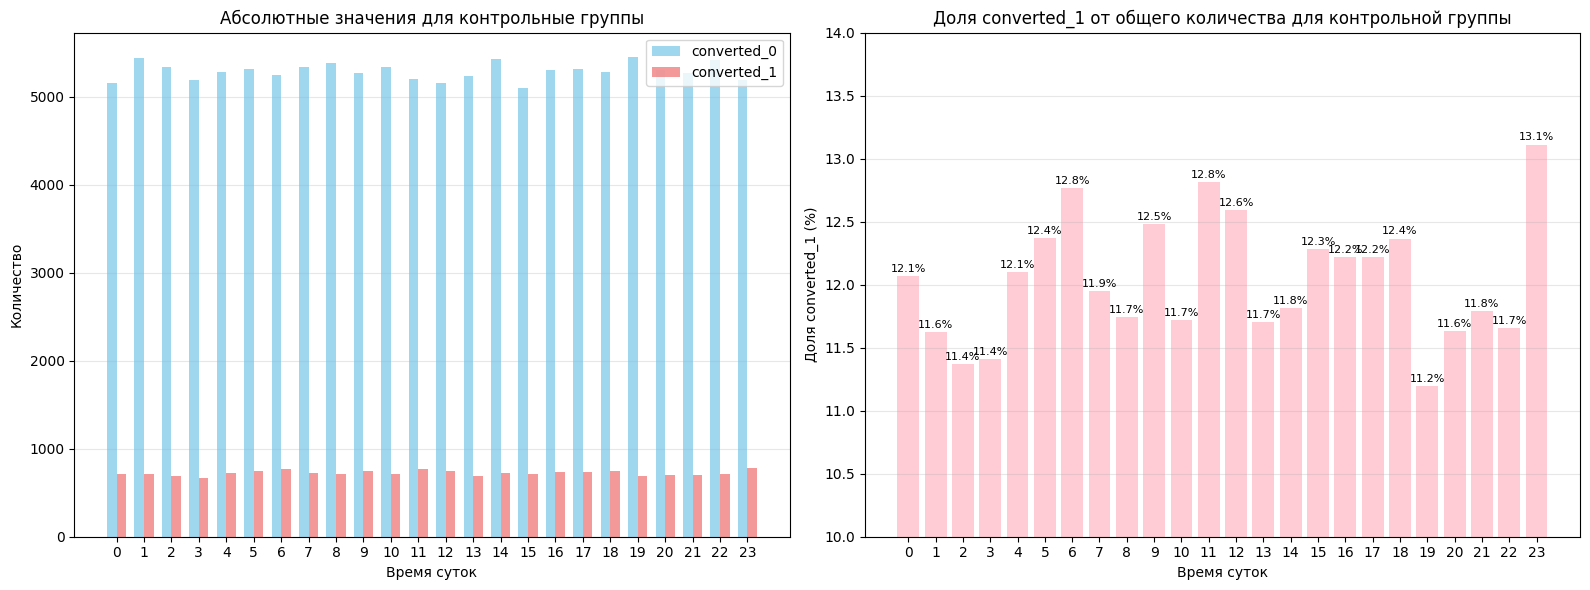

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
x = np.arange(len(cont_hour['hour_of_a_day']))
width = 0.35
ax1.bar(x - width/2, cont_hour['converted_0'], width,
                label='converted_0', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, cont_hour['converted_1'], width,
                label='converted_1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Время суток')
ax1.set_ylabel('Количество')
ax1.set_title('Абсолютные значения для контрольные группы')
ax1.set_xticks(x)
ax1.set_xticklabels(cont_hour['hour_of_a_day'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Доля converted_1 от общего
cont_hour['total'] = cont_hour['converted_0'] + cont_hour['converted_1']
cont_hour['converted_1_ratio'] = cont_hour['converted_1'] / cont_hour['total'] * 100

bars = ax2.bar(cont_hour['hour_of_a_day'], cont_hour['converted_1_ratio'],
                alpha=0.8, color='pink')
ax2.set_xlabel('Время суток')
ax2.set_ylabel('Доля converted_1 (%)')
ax2.set_title('Доля converted_1 от общего количества для контрольной группы')
ax2.set_xticks(cont_hour['hour_of_a_day'])
ax2.grid(True, alpha=0.3, axis='y')

# Обозначения на столбцах
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=8)
ax2.set_ylim(10, 14)
plt.tight_layout()
plt.show()

Вывод: как мы можем заметить доля конверсии_1 имеет волнообразный характер и пик находится в 23 часах - 13.1%. При этом абсолютный минимум равен 11.2% и находится в 19 часах. Разница между максимальной и минимальной конверсией составлляет 1.9%. Стоит отметить, что часы пиковой активности находятся: 6, 11 и 23 часа соответсвенно - возможно, это связано с:
1. началом дня
2. времея перед обедом
3. время перед сном



Анализ конверсии по часам в сутки для экспериментальной группы

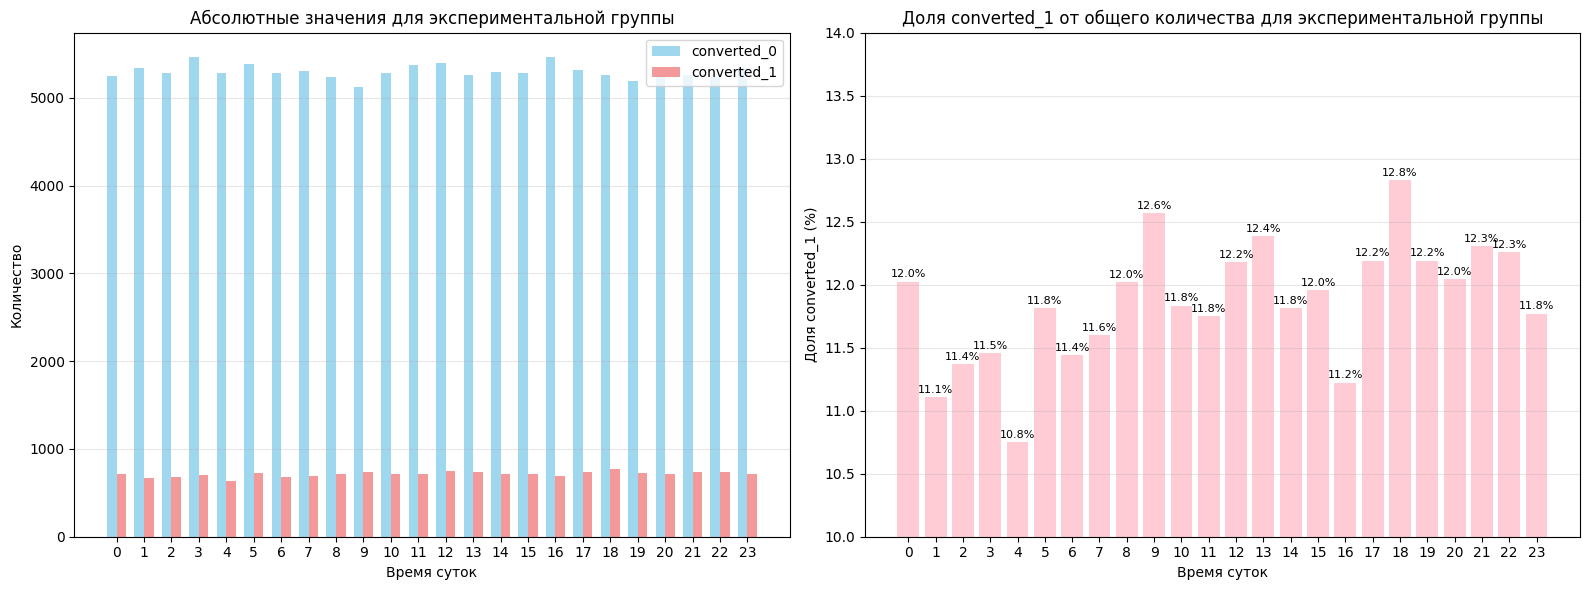

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
x = np.arange(len(treat_hour['hour_of_a_day']))
width = 0.35
ax1.bar(x - width/2, treat_hour['converted_0'], width,
                label='converted_0', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, treat_hour['converted_1'], width,
                label='converted_1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Время суток')
ax1.set_ylabel('Количество')
ax1.set_title('Абсолютные значения для экспериментальной группы')
ax1.set_xticks(x)
ax1.set_xticklabels(treat_hour['hour_of_a_day'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Доля converted_1 от общего
treat_hour['total'] = treat_hour['converted_0'] + treat_hour['converted_1']
treat_hour['converted_1_ratio'] = treat_hour['converted_1'] / treat_hour['total'] * 100

bars = ax2.bar(treat_hour['hour_of_a_day'], treat_hour['converted_1_ratio'],
                alpha=0.8, color='pink')
ax2.set_xlabel('Время суток')
ax2.set_ylabel('Доля converted_1 (%)')
ax2.set_title('Доля converted_1 от общего количества для экспериментальной группы')
ax2.set_xticks(treat_hour['hour_of_a_day'])
ax2.grid(True, alpha=0.3, axis='y')

# Обозначения на столбцах
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=8)
ax2.set_ylim(10, 14)
plt.tight_layout()
plt.show()

Вывод: пик так же находится в 18 часах, но составляет только 12.8%, что на 0.4% ниже, чем максимум в контрольной группе. Стоит уточнить, что минимум находится в 4 часах, а не 19, как в контрольной группе. Часы пиковой активности тоже чутка отличаются: 9 - 12.8%, 13 - 12.4%, 18 - 12.8%. В этом случае, пиковые часы скорее всего связаны с:
1. Началом рабочего дня
2. Обеденное время
3. Конец рабочего дня

### Анализ конверсии по дням недели

In [ ]:
cont_day = res[res['group'] == 'control']
cont_day = cont_day.groupby('day_of_a_week')[['converted_0', 'converted_1']].sum().reset_index()
treat_day = res[res['group'] == 'treatment']
treat_day = treat_day.groupby('day_of_a_week')[['converted_0', 'converted_1']].sum().reset_index()

Анализ конверсии по дням недель для контрольной группы

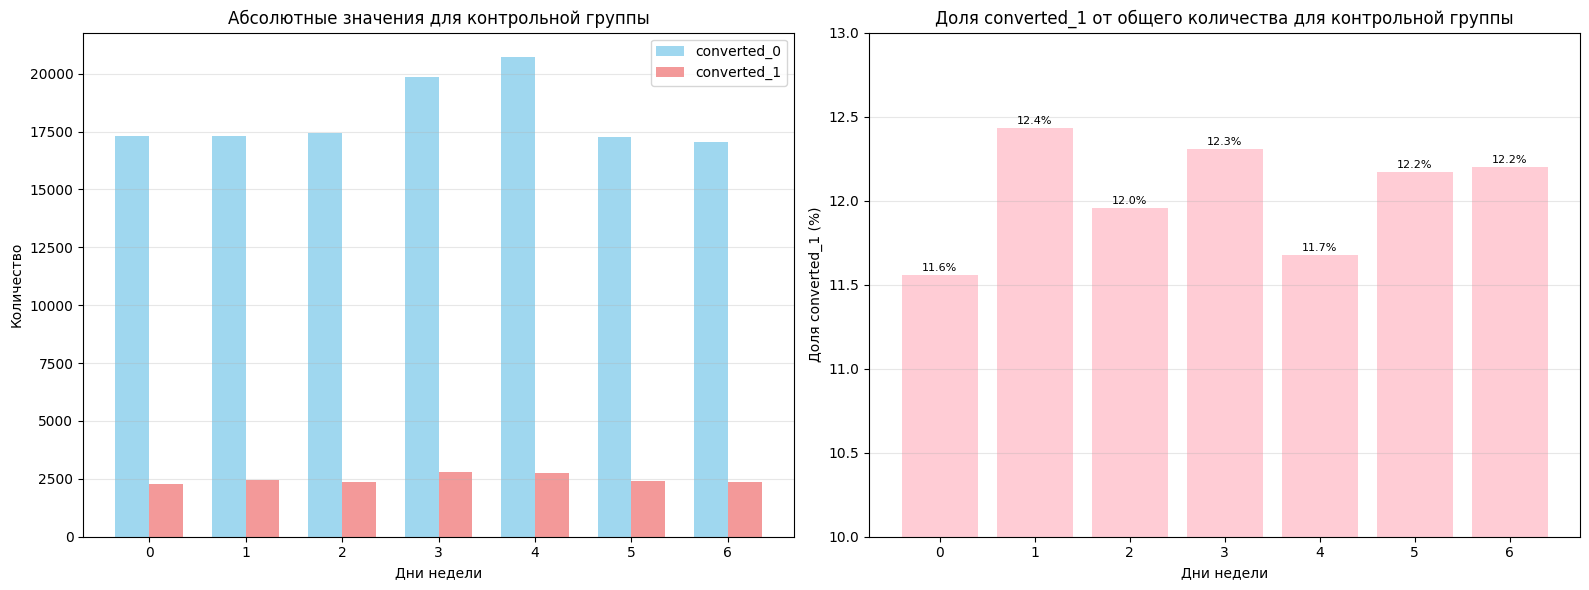

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
x = np.arange(len(cont_day['day_of_a_week']))
width = 0.35

ax1.bar(x - width/2, cont_day['converted_0'], width,
                label='converted_0', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, cont_day['converted_1'], width,
                label='converted_1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Дни недели')
ax1.set_ylabel('Количество')
ax1.set_title('Абсолютные значения для контрольной группы')
ax1.set_xticks(x)
ax1.set_xticklabels(cont_day['day_of_a_week'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Доля converted_1 от общего
cont_day['total'] = cont_day['converted_0'] + cont_day['converted_1']
cont_day['converted_1_ratio'] = cont_day['converted_1'] / cont_day['total'] * 100

bars = ax2.bar(cont_day['day_of_a_week'], cont_day['converted_1_ratio'],
                alpha=0.8, color='pink')
ax2.set_xlabel('Дни недели')
ax2.set_ylabel('Доля converted_1 (%)')
ax2.set_title('Доля converted_1 от общего количества для контрольной группы')
ax2.set_xticks(cont_day['day_of_a_week'])
ax2.grid(True, alpha=0.3, axis='y')

# Обозначения на столбцах
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=8)
ax2.set_ylim(10, 13)
plt.tight_layout()
plt.show()

Стоит отметить, что для контроольной группы абсолютное значение отрицательной конверсии в четверг и пятницу были наибольшими, скорее всего это связанно с тем, что в эти дни просто больше людей заходило на сайт платформы. Положительная конверсия в среднем колебалась окло значения 2500. А вот в относительном соотношении - наибольшая доля положительной конверсии было во вторник - 12.4%, причем минимум - был в начале недели - 11.6%

Анализ конверсии по дням недель для экспериментальной группы

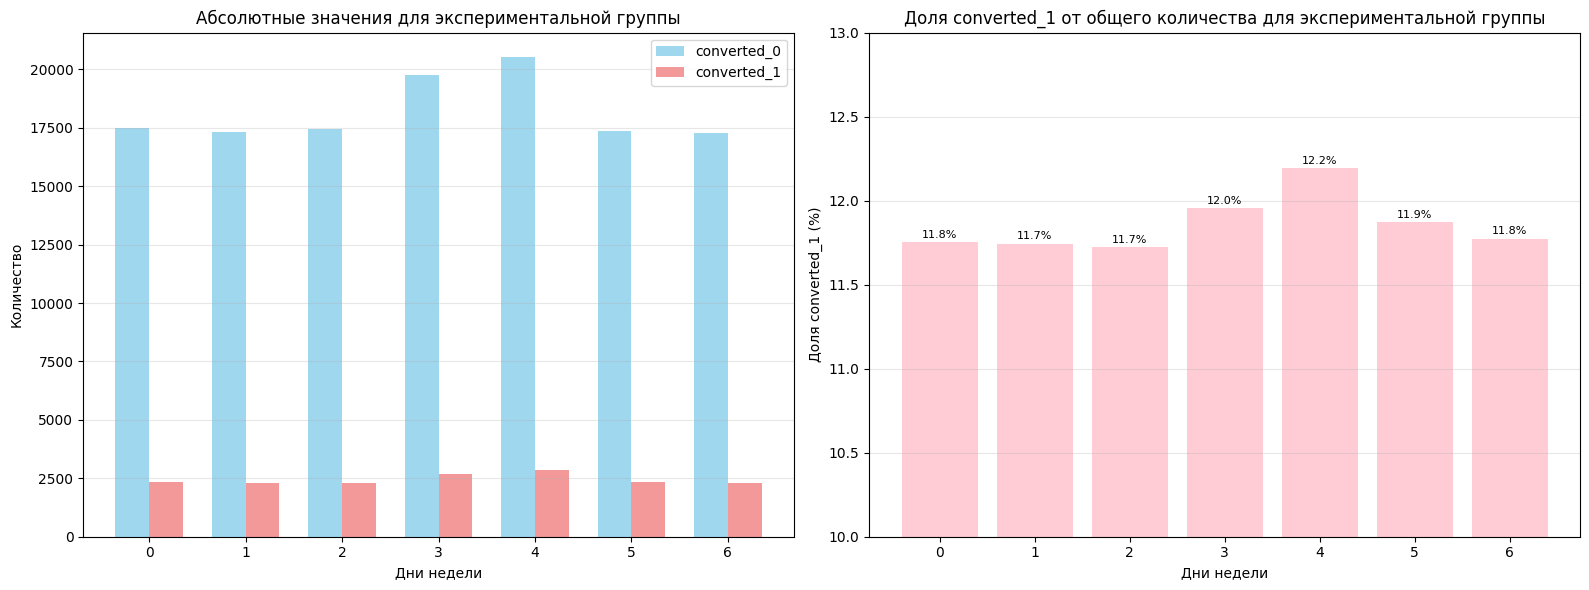

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
x = np.arange(len(treat_day['day_of_a_week']))
width = 0.35

ax1.bar(x - width/2, treat_day['converted_0'], width,
                label='converted_0', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, treat_day['converted_1'], width,
                label='converted_1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Дни недели')
ax1.set_ylabel('Количество')
ax1.set_title('Абсолютные значения для экспериментальной группы')
ax1.set_xticks(x)
ax1.set_xticklabels(treat_day['day_of_a_week'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Доли (converted_1 от общего)
treat_day['total'] = treat_day['converted_0'] + treat_day['converted_1']
treat_day['converted_1_ratio'] = treat_day['converted_1'] / treat_day['total'] * 100

bars = ax2.bar(treat_day['day_of_a_week'], treat_day['converted_1_ratio'],
                alpha=0.8, color='pink')
ax2.set_xlabel('Дни недели')
ax2.set_ylabel('Доля converted_1 (%)')
ax2.set_title('Доля converted_1 от общего количества для экспериментальной группы')
ax2.set_xticks(treat_day['day_of_a_week'])
ax2.grid(True, alpha=0.3, axis='y')

# Обозначения на столбцах
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=8)
ax2.set_ylim(10, 13)
plt.tight_layout()
plt.show()

Интересно отметить, что и в экспериментальной группе больше всего отрицательной конверсии в абсолютном знечении пришлось на четперг и пятницу - но это скорее всего связано с тем, что именно в эти дни было больше всего пользователей, которые заходили на сайт. Положительная конверсия так же колеблется около значения 2500. А если обратить внимание на относительно значение, то абсолютный максимум по конверсии был в пятницу - 12.2%, а в остальные дни значения примерно одинаковы.   

### Анализ конверсии за весь период

Тут мы считали дни именно с начала эксперимента, а не по календарному дню, чтобы не было "обрывочных дней"

In [ ]:
cont_per = res[res['group'] == 'control']
cont_per = cont_per.groupby('day_of_a_period')[['converted_0', 'converted_1']].sum().reset_index()
treat_per = res[res['group'] == 'treatment']
treat_per = treat_per.groupby('day_of_a_period')[['converted_0', 'converted_1']].sum().reset_index()

Анализ конверсии по дням за период для контрольной группы

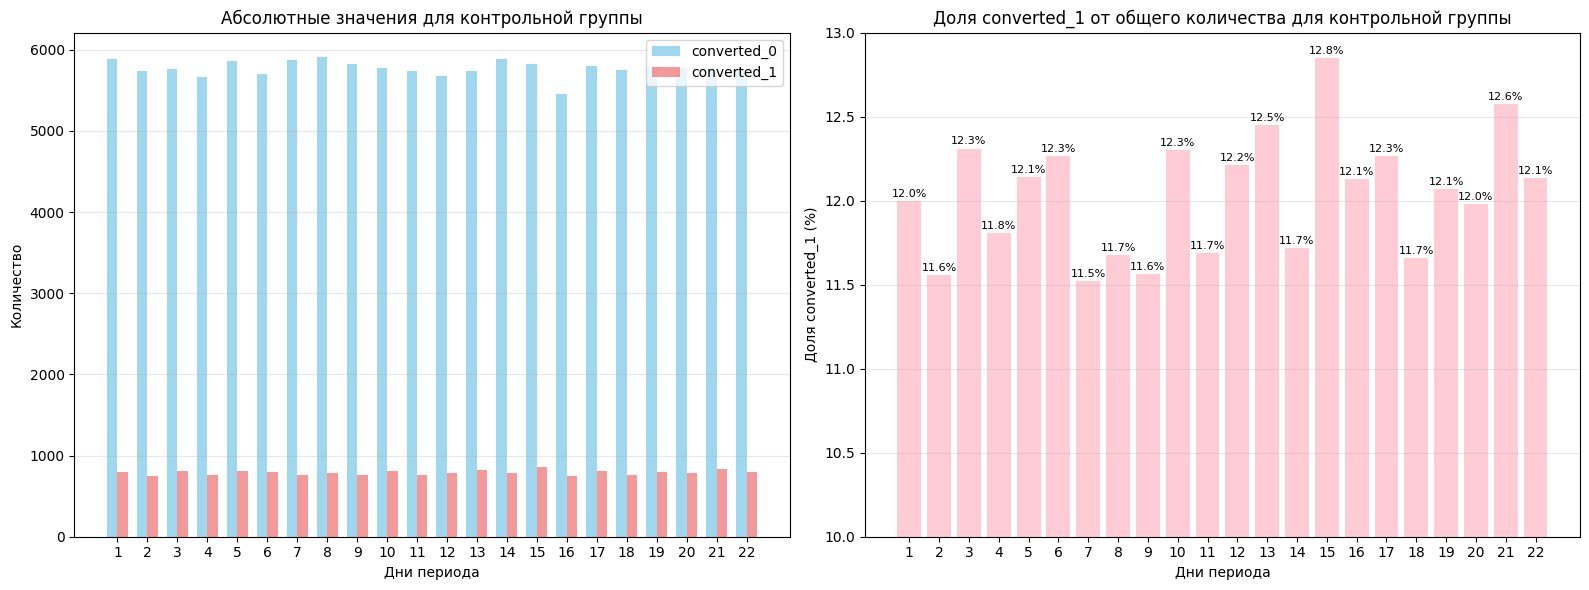

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
x = np.arange(len(cont_per['day_of_a_period']))
width = 0.35

ax1.bar(x - width/2, cont_per['converted_0'], width,
                label='converted_0', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, cont_per['converted_1'], width,
                label='converted_1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Дни периода')
ax1.set_ylabel('Количество')
ax1.set_title('Абсолютные значения для контрольной группы')
ax1.set_xticks(x)
ax1.set_xticklabels(cont_per['day_of_a_period'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Доли (converted_1 от общего)
cont_per['total'] = cont_per['converted_0'] + cont_per['converted_1']
cont_per['converted_1_ratio'] = cont_per['converted_1'] / cont_per['total'] * 100

bars = ax2.bar(cont_per['day_of_a_period'], cont_per['converted_1_ratio'],
                alpha=0.8, color='pink')
ax2.set_xlabel('Дни периода')
ax2.set_ylabel('Доля converted_1 (%)')
ax2.set_title('Доля converted_1 от общего количества для контрольной группы')
ax2.set_xticks(cont_per['day_of_a_period'])
ax2.grid(True, alpha=0.3, axis='y')

# Обозначения на столбцах
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=8)
ax2.set_ylim(10, 13)
plt.tight_layout()
plt.show()

Абсолютные значение положительной и отрицательной конверсии по дняи почти не отличаются, но на 16 день с начала эксперимента наблюдалось самое малое количество отрцательной конверсии. Стоит обратить внимание именно на относительные значения. В первые день было 12%, а на второй - всего лишь 11.6%, то есть проищошел спад. Самое максимальное значение наблюдалось как раз 15 числа и составило 12.8%. Минимальные значения конверсий наблюдались 2, 7 и 10 числах и составило 11.5% и 11.6%.

Анализ конверсии по дням за период для экспериментальной группы

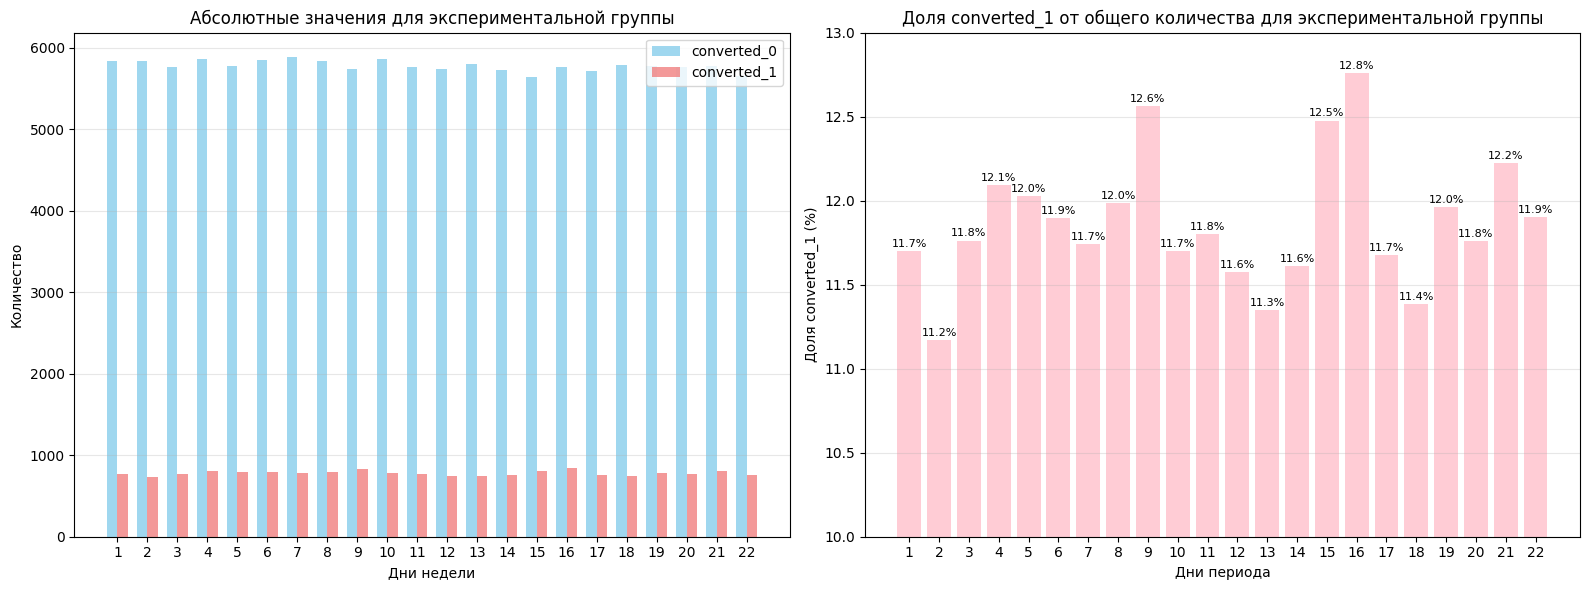

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
x = np.arange(len(treat_per['day_of_a_period']))
width = 0.35

bars1 = ax1.bar(x - width/2, treat_per['converted_0'], width,
                label='converted_0', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, treat_per['converted_1'], width,
                label='converted_1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Дни недели')
ax1.set_ylabel('Количество')
ax1.set_title('Абсолютные значения для экспериментальной группы')
ax1.set_xticks(x)
ax1.set_xticklabels(treat_per['day_of_a_period'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Доля converted_1 от общего
treat_per['total'] = treat_per['converted_0'] + treat_per['converted_1']
treat_per['converted_1_ratio'] = treat_per['converted_1'] / treat_per['total'] * 100

bars3 = ax2.bar(treat_per['day_of_a_period'], treat_per['converted_1_ratio'],
                alpha=0.8, color='pink')
ax2.set_xlabel('Дни периода')
ax2.set_ylabel('Доля converted_1 (%)')
ax2.set_title('Доля converted_1 от общего количества для экспериментальной группы')
ax2.set_xticks(treat_per['day_of_a_period'])
ax2.grid(True, alpha=0.3, axis='y')

# Обозначения на столбцах
for bar in bars3:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=8)
ax2.set_ylim(10, 13)
plt.tight_layout()
plt.show()

Абсолютные значения для экспериментальной группы выгледят почти аналогично контрольной группе. Интересно заметить, что минимальное значение конверсии пришлось на 2 день с начала и составило только 11.2%, что на 0.3% меньше, чем минимальное значение в контрольной группе.

### **Анализ конверсии по неделям**

Важно проанализировать поведение пользовователей не только в общем случае (дни недели, часы), но и по отдельности в каждую неделю проведения эскперимента

In [ ]:
res['week_of_year'] = res['timestamp'].dt.isocalendar().week
# Находим уникальные недели
unique_weeks = sorted(res['week_of_year'].unique())
weeks_dict = {}
for week_num in unique_weeks[:4]:
    weeks_dict[f'week_{week_num}'] = res[res['week_of_year'] == week_num]
    print(f"Неделя {week_num}: {len(weeks_dict[f'week_{week_num}'])} записей")

Неделя 1: 44920 записей
Неделя 2: 92701 записей
Неделя 3: 91181 записей
Неделя 4: 59833 записей


эксперимент проводился 4 недели. Это достаточно длительный период. Длительный период теста создаёт риск Maturity Effect *("эффект зрелости")*.

**Maturity effect** в A/B-тестировании относится к естественным изменениям у пользователей (например, привыкание к сайту, скука или изменение настроения) со временем, которые происходят независимо от вашего эксперимента и могут искажать результаты, ложным образом показывая, что одна версия лучше или хуже другой.

Данный эффект угрожает внутренней достоверности, создавая впечатление, что изменение дизайна сработало, когда на самом деле пользователи просто эволюционируют или устают, особенно в долгих тестах, что требует стратегий вроде сокращения длительности, использования контрольных групп или частых проверок измерений для смягчения эффекта.

Стоит отметить и кол-во пользователей, которые участвовали в тестироании каждую неделю. На 2,3 неделях примерно одинаковое кол-во поль-зователей, но в 1 неделе их гораздо меньше, как в 4. Это связано с тем, что эксперимент начался не с начала первой надели, аналогично, он закончилася не под конец 4ой недели

данная разность в количнестве пользователей уравновешивается выбором метрики, как доля.

In [ ]:
week_1 = res[res['week_of_year'] == 1]
week_2 = res[res['week_of_year'] == 2]
week_3 = res[res['week_of_year'] == 3]
week_4 = res[res['week_of_year'] == 4]

Для этого создаём датасет, который будет хранить информацию об общей конверсии пользователей, а также процент пользователей, которые совершили целове действие в определённую неделю

Данные метрики считаются отдельно для контрольной и тритмент группы

In [ ]:
conversion_analysis = pd.DataFrame()
for week_num in range(1, 5):
    week_df = weeks_dict[f'week_{week_num}']

    #считаем конверсию
    total_users = len(week_df)
    conv_users = week_df['converted'].sum()
    conv_rate = (conv_users / total_users) * 100

    conversion_analysis.loc[week_num, 'total_users'] = total_users
    conversion_analysis.loc[week_num, 'converted_users'] = conv_users
    conversion_analysis.loc[week_num, 'conversion_rate'] = conv_rate

    #разделяем группы control/treatment
    if 'group' in week_df.columns:
        group_stats = week_df.groupby('group')['converted'].agg(['count', 'sum'])
        group_stats['rate'] = (group_stats['sum'] / group_stats['count']) * 100

        conversion_analysis.loc[week_num, 'control_rate'] = group_stats.loc['control', 'rate'] if 'control' in group_stats.index else 0
        conversion_analysis.loc[week_num, 'treatment_rate'] = group_stats.loc['treatment', 'rate'] if 'treatment' in group_stats.index else 0
conversion_analysis = conversion_analysis.round(2)
conversion_analysis

,total_users,converted_users,conversion_rate,control_rate,treatment_rate
1,44920.0,5307.0,11.81,12.04,11.59
2,92701.0,11067.0,11.94,11.84,12.04
3,91181.0,10966.0,12.03,12.19,11.86
4,59833.0,7165.0,11.97,12.11,11.83


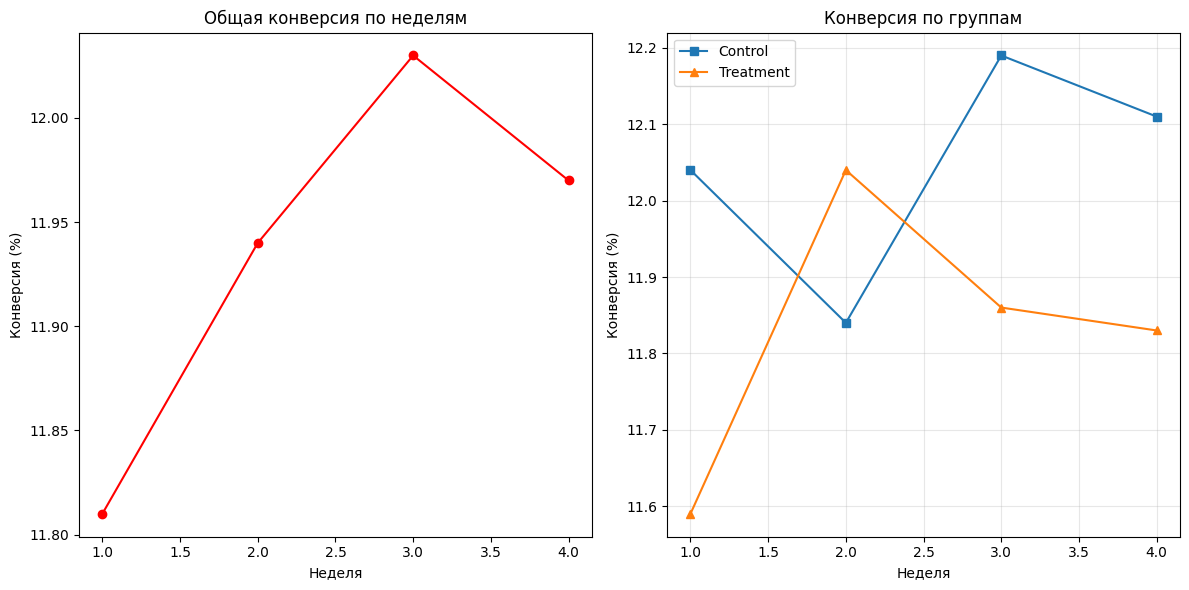

In [ ]:
plt.figure(figsize=(12, 6))
#Конверсия
plt.subplot(1, 2, 1)
plt.plot(conversion_analysis.index, conversion_analysis['conversion_rate'],
         marker='o', color = 'red')
plt.title('Общая конверсия по неделям')
plt.xlabel('Неделя')
plt.ylabel('Конверсия (%)')

# Раздельно по группам
plt.subplot(1, 2, 2)
if 'control_rate' in conversion_analysis.columns:
    plt.plot(conversion_analysis.index, conversion_analysis['control_rate'],
             marker='s', label='Control')
    plt.plot(conversion_analysis.index, conversion_analysis['treatment_rate'],
             marker='^', label='Treatment')
    plt.title('Конверсия по группам')
    plt.xlabel('Неделя')
    plt.ylabel('Конверсия (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

можно заметить, что общая конверсия, действительно росла до третьей недели, далее упала почти на 1%

далее рассмотрим с разделением по группам:

в среднем, конверсия контрольной группы находится на более высоком уровне, чем конверсия тритмент группы. Но можно заметить, что на второй неделе конверсия контрольной группы - снизилась, а тритмент, наоборот, выросла и стала больше, чем у контрольной группы

- **Тритмент группа:**

  - 1-2 неделя: пиковый рост конверсии примерно до 12.05%
  - 3-4 неделя: постепенный спад конверсии примерно до 11.85%

спад примерно на ~1%. Maturity effect не задействован. Можно сказать, что в целом поведение пользователей стабильно из недели в неделю, тк значения конверсии изменяются не более чем на 1%

- **Контрольная группа:**

   - 1-2 неделя: спад конверсии примерно до 11.82%
   - 3 неделя: пиковый рост конверсии до 12.2%
   - 4 неделя: легкий спад конверсии примерно до 12.12%

Рост примерно на ~1% Maturity effect не задействован. Можно сказать, что в целом поведение пользователей стабильно из недели в неделю, тк значения конверсии изменяются не более чем на 0.5%

## **Кумулятивный анализ**

In [ ]:
#объединяем все недели для общего анализа
all_data = pd.concat([weeks_dict[f'week_{i}'] for i in range(1, 5)], ignore_index=True)
all_data = all_data.sort_values('timestamp').reset_index(drop=True)

#столбец с датой (без времени)
all_data['date'] = all_data['timestamp'].dt.date
daily_cumulative = pd.DataFrame()
# Для каждой группы
for group_name in ['control', 'treatment']:
    group_data = all_data[all_data['group'] == group_name].copy()
    #группируем по дате, те нам нужны все users того или иного дня
    daily_stats = group_data.groupby('date').agg({
        'user_id': 'count',
        'converted': 'sum'
    }).rename(columns={'user_id': 'daily_users', 'converted': 'daily_converted'})
    daily_stats = daily_stats.sort_index()
    # Кумулятивные метрики
    daily_stats['cumulative_users'] = daily_stats['daily_users'].cumsum() #.cumsum() вычисляет кумулятивную сумму параметра
    daily_stats['cumulative_converted'] = daily_stats['daily_converted'].cumsum()
    daily_stats['cumulative_rate'] = (daily_stats['cumulative_converted'] / daily_stats['cumulative_users']) * 100
    daily_stats['daily_rate'] = (daily_stats['daily_converted'] / daily_stats['daily_users']) * 100
    daily_stats['group'] = group_name
    daily_cumulative = pd.concat([daily_cumulative, daily_stats])

### **Кумулятивный анализ конверсии по группам**

Text(0.5, 1.0, 'Кумулятивный анализ конверсии по группам')

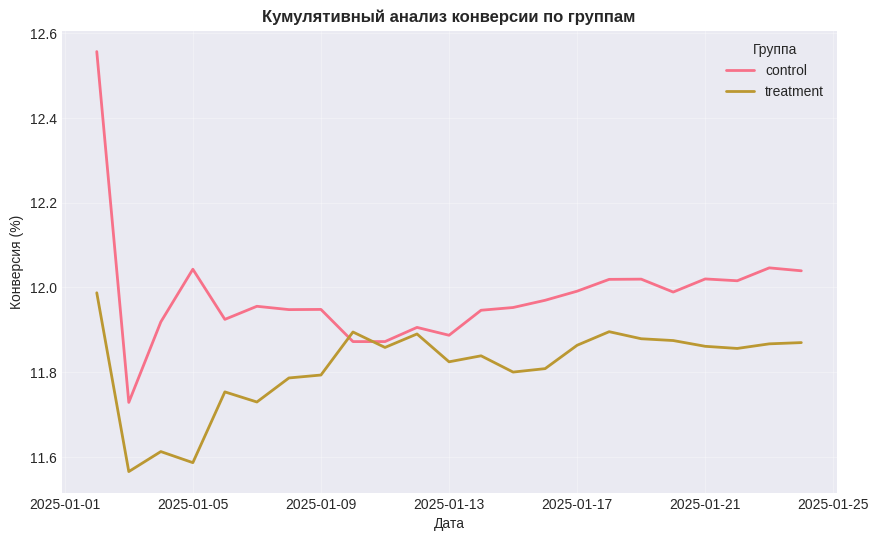

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.figure(figsize=(10, 6))
for group in ['control', 'treatment']:
    group_data = daily_cumulative[daily_cumulative['group'] == group]
    plt.plot(group_data.index, group_data['cumulative_rate'], linewidth=2, label=group)

plt.title('Кумулятивная конверсия (%)', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Конверсия (%)')
plt.legend(title='Группа')
plt.grid(True, alpha=0.3)
plt.title('Кумулятивный анализ конверсии по группам', fontweight='bold')

Теперь рассмотрим, в общем, поведение пользователей на протяжении всего тестирования.

- Контрольная группа:

Примерно на третий день тестирования наблюдается уменьшение конверсии. Далее следует лёгкое коллебание, которое стабилизируется к второй неделе тестирования стабизируется и показывает умеренный возрастающих тренд

- Тритмент группа:

Аналогично с контрольно группой, на третий день тестирования наблюдается уменьшение конверсии. Далее постепенный рост, который к второй неделе стабилизируется с почти нулевым трендом
-  У обеих групп конверсия стабилизировалась к концу теста:
    - В первые дни (до 5 января) наблюдается сильная волатильность.Возможный эффект новизны: пользователи исследуют новую страницу
    - После 10 января кривые становятся более плавными. Эффект новизны начинает затухать
    - К 25 января обе кривые практически вышли на плато. Эффект новизны, вероятно, миновал
- Сходимость результатов:
    - Разрыв между группами сохраняется на протяжении всего теста
Можно заметить, что, в среднем, кумулятивная функция контрольной группы находится на примерно 0.2-0.4 процентных пункта функци тритмент группы
- Улучшение конверсии устойчиво на протяжении всего месяца
- Эффект зрелости:
    - В Тритмент группе:
      - 1-5 января:волатильность:возможна начальная адаптация
      - 6-10 января: стабилизация на уровне ~11.85%
      - 11-25 января: устойчивый уровень ~11.9 - 12%
      - ВЫВОД: Если эффект зрелости мог произойти, он проявился в первые 10 дней, но был очень умеренным
    - В контрольной группе:
      - на протяжении всего стабильность на уровне ~11.8 - 11.9%
      - ВЫВОД: вероятно наблюдается классический эффект зрелости, где пользователи привыкли к старому интерфейсу

## Однородность по времени

Для проверки на однородность выборок необхоимо проверить по ключевым метрикам, но так как по сути мы знаем только время и можем проверить только его на однородность

Время в общем. KS-тест проверяет: "Приходят ли пользователи в одно и то же время?

In [ ]:
group_a = res[res['group'] == 'control']['timestamp']
group_b = res[res['group'] == 'treatment']['timestamp']

In [ ]:
from scipy.stats import ks_2samp, anderson_ksamp
import warnings
warnings.filterwarnings('ignore')

#преобразование временных меток в числовой формат (например, Unix timestamp)
group_a_numeric = group_a.astype('int64') // 10**9
group_b_numeric = group_a.astype('int64') // 10**9

#тест Колмогорова-Смирнова для распределений
ks_stat, ks_p = ks_2samp(group_a_numeric, group_b_numeric)
print(f"KS test: statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

KS test: statistic=0.0000, p-value=1.0000


Получилось, что p_value = 1.0 >= 0.05 - следовательно, у нас нет причин отклонять нашу 0-ую гипотезу. Так как сама статистика (разница) равна 0.0000 < 0.01 - это означает, что различие в выборках мизерное и не имеют бизнес-значения, то есть мы можем считать, что распределения почти одинаковы

## A/A тест

На самом деле А/А должно проводиться до самого A/B тестирования для проверки корректности системы тестирования: проверка правильности сплит-системы, выявление багов системы. Но так как у нас уже проведен A/B тест, то сложно определить правильно ли сработало распределение, мы не можем точно сказать по верно ли было сделано распределение по группам.

# Метрика

Для обеспечения статистической значимсоти мы будем анализировать не все временные метки, а по агрегированным временным интервалам.
1. Мы определяем такой промежуток времени, чтобы в каждом интервале, начиная с первого, у нас были бы данные минимум про n = 90 человек. Это число выбрано исходя из требования центральной предельной теоремы, которая гарантирует нормальность распределения выборочных средних при n ≥ 30. Увеличивая это значение до 90, мы обеспечиваем дополнительную устойчивость результатов и возможность обнаруживать даже небольшие изменения конверсии.
2. В каждом интервале мы проверяем, чтобы в кажой из групп, было не менее 90 человек. Это требование обеспечивает сопоставимость групп и достаточную мощность статистических тестов
3. Для каждого временного интервала и для каждой группы мы рассчитываем общее количество просмотров и количество подписок на курс -> поделив одно на другое, мы получим **CR (Conversion Rate)**.
4. CR - это ключевая бизнес-метрика, коэффициент конверсии, который показывает какое количество людей совершили целевое действие, подписались на учебный курс. Это метрика позволяет измерить эффективность изменений и найти зону для улучшений
5. Преимущества похода заключаются в стабильности, так как агрегация по времени снижает влияние временных аномалий, сравнимость двух групп, временные ряды CR позволяют отследить динамику эффективности, CR напрямую связан с ключевыми бизнес-метриками

In [ ]:
df = res.copy()
df = df.sort_values('timestamp')
df

,user_id,timestamp,group,landing_page,converted,hour_of_a_day,day_of_a_week,day_of_a_period,converted_0,converted_1,week_of_year
267333,922696,2025-01-02 13:42:05.378582,treatment,new_page,0,13,3,1,True,False,1
138400,781507,2025-01-02 13:42:15.234051,control,old_page,0,13,3,1,True,False,1
98018,737319,2025-01-02 13:42:21.786186,control,old_page,0,13,3,1,True,False,1
172048,818377,2025-01-02 13:42:26.640581,treatment,new_page,0,13,3,1,True,False,1
87556,725857,2025-01-02 13:42:27.851110,treatment,new_page,0,13,3,1,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
154539,799244,2025-01-24 13:41:15.325359,treatment,new_page,0,13,4,22,True,False,4
162857,808330,2025-01-24 13:41:19.152664,control,old_page,0,13,4,22,True,False,4
194616,843121,2025-01-24 13:41:44.097174,treatment,new_page,0,13,4,22,True,False,4
188426,836373,2025-01-24 13:41:52.604673,control,old_page,0,13,4,22,True,False,4


In [ ]:
def count_users_per_t_minutes(df, t_minutes):
    df_copy = df.copy()
    df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

    #время первого события
    first_event_time = df_copy['timestamp'].min()

    #устанавливаем время как индекс
    df_indexed = df_copy.set_index('timestamp')

    #используем origin='start' чтобы начать с первого события
    resampled = df_indexed.resample(f'{t_minutes}T', origin='start')

    result_df = pd.DataFrame({
        'total_users': resampled.size(),
        'conversions': resampled['converted'].sum(),
    })
    return result_df.reset_index()

new_control = count_users_per_t_minutes(df[df['group'] == 'control'], 30)
new_treatment = count_users_per_t_minutes(df[df['group'] == 'treatment'], 30)


In [ ]:
new_control.head()

,timestamp,total_users,conversions
0,2025-01-02 13:42:15.234051,144,17
1,2025-01-02 14:12:15.234051,139,27
2,2025-01-02 14:42:15.234051,125,12
3,2025-01-02 15:12:15.234051,116,15
4,2025-01-02 15:42:15.234051,128,18


In [ ]:
min(new_control['total_users'])

95

In [ ]:
min(new_treatment['total_users'])

102

Таким образом, оптимальный отрезок времени, в каждый из которых появляется хотя бы 90 клиентов равен 30 минутам.

In [ ]:
new_control['CR'] = new_control['conversions'] / new_control['total_users']
new_control

,timestamp,total_users,conversions,CR
0,2025-01-02 13:42:15.234051,144,17,0.118056
1,2025-01-02 14:12:15.234051,139,27,0.194245
2,2025-01-02 14:42:15.234051,125,12,0.096000
3,2025-01-02 15:12:15.234051,116,15,0.129310
4,2025-01-02 15:42:15.234051,128,18,0.140625
...,...,...,...,...
1051,2025-01-24 11:12:15.234051,133,21,0.157895
1052,2025-01-24 11:42:15.234051,137,9,0.065693
1053,2025-01-24 12:12:15.234051,146,21,0.143836
1054,2025-01-24 12:42:15.234051,120,13,0.108333


In [ ]:
new_treatment['CR'] = new_treatment['conversions'] / new_treatment['total_users']
new_treatment

,timestamp,total_users,conversions,CR
0,2025-01-02 13:42:05.378582,146,16,0.109589
1,2025-01-02 14:12:05.378582,129,14,0.108527
2,2025-01-02 14:42:05.378582,156,14,0.089744
3,2025-01-02 15:12:05.378582,141,16,0.113475
4,2025-01-02 15:42:05.378582,139,18,0.129496
...,...,...,...,...
1051,2025-01-24 11:12:05.378582,115,17,0.147826
1052,2025-01-24 11:42:05.378582,128,17,0.132812
1053,2025-01-24 12:12:05.378582,137,21,0.153285
1054,2025-01-24 12:42:05.378582,132,13,0.098485


In [ ]:
new_control.to_csv('control.csv', index=False)
new_treatment.to_csv('treatment.csv', index=False)

Text(0.5, 1.0, 'mean = 0.118659, median 0.118056')

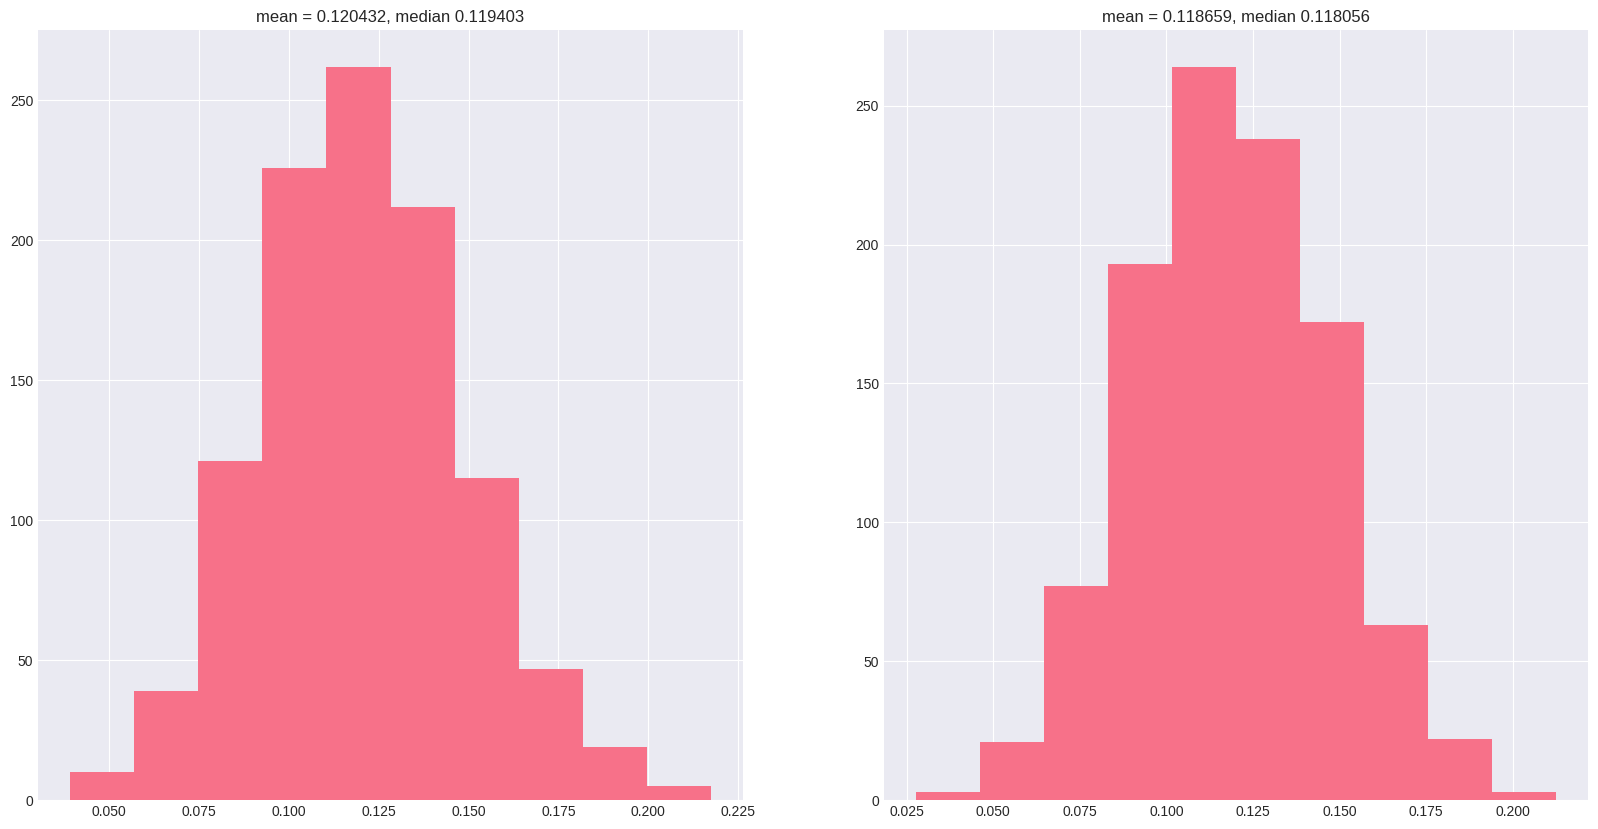

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].hist(new_control['CR'])
ax[0].set_title(f'mean = %f, median %f' % (new_control['CR'].mean(), new_control['CR'].median()))
ax[1].hist(new_treatment['CR'])
ax[1].set_title(f'mean = %f, median %f' % (new_treatment['CR'].mean(), new_treatment['CR'].median()))

In [ ]:
contr_df = pd.read_csv("control.csv")
treat_df = pd.read_csv("treatment.csv")

In [ ]:
contr_df['CR'].describe()

,CR
count,1056.000000
mean,0.120432
std,0.028370
min,0.039216
25%,0.101449
50%,0.119403
75%,0.138518
max,0.217391


In [ ]:
treat_df['CR'].describe()

,CR
count,1056.000000
mean,0.118659
std,0.027654
min,0.027586
25%,0.099291
50%,0.118056
75%,0.138211
max,0.212598


In [ ]:
print(contr_df['CR'].median())
print(treat_df['CR'].median())

0.1194029850746268
0.1180555555555555


# Выбор параметров для тестирования

Изучив распределение данных выявилось, что на первый взгляд контрольная и тритмент группа ведут себя похоже. Ключевое отличие между контрольной и тритмент группой - это лендинг.

Что такое лендинг?

Лендинг, или посадочная страница, — это одностраничный сайт, созданный для продвижения конкретного продукта, услуги или события. Основная цель лендинга — побудить посетителя совершить целевое действие, например, купить товар, подписаться на рассылку или оставить контактные данные. Лендинги часто используются для повышения эффективности рекламы и увеличения аудитории.

Как мы видим по EDA лендинг, на первый взгляд, не очень хорошо справился со своей задачей (но пока точные выводы сделать нельзя). Таким образом основывась на статью "Justify Your Alpha: A Primer on Two Practical Approaches" стоит рассмотреть стоимость ошибки первово рода и ошибки второго рода.

В статье основной акцент делается на то, что "дефолтный" выбор а = 0.05 может привести к статистически нерелевантным результатам и к выбору уровня значимости нужно подходить более глобально, учитывая не только вес ошибки первого рода, но и второго, а также важно рассматривать и совокупную частоту ошибок (и второго, и первого рода).

Коэн (1988) рекомендовал дизайн исследования с уровнем ошибки первого рода 5% и уровнем ошибки второго рода 20%. Лично он считал, что «ошибки первого рода примерно в четыре раза серьезнее ошибок второго рода». При проверке гипотезы мы стремимся не просто принимать точные решения, но и принимать точные решения, учитывая имеющиеся ресурсы (например, время и деньги).В нашем случае реально ли у ошибки первого рода такой вес?

Сформулируем гипотезы:

- Нулевая гипотеза - новая версия лендинга не влияет на конверсию, следовательно оставляем старую
- Альтернативная гипотеза - новая версия лендинга меняет на конверсию, рассматриваем общее внедрение нового лендинга, что потребует дополнительных издержек

По EDA распредление контрольной и тестовой группы схожы. Из этого можно сделать первичный вывод, что средний уровень конверсии между группами не отличается радикально. В таком случае при выборе любой из двух видов версий лендига для  образовательной платформы это не будет означать радикальных изменений в прибыли. Таким образом лучше подробней рассмотреть возможеные издержки принятия решения каждой группы. При внедрении нового лендинга появляются доп. издержки для создания этого лендинга и его общего внедрения.

Таким образом рассмотрим средние показатели по каждой группе:

контрольная группа:

1. mean:0.120438
2. median:0.119126458530432

Тритмент группа:

1. mean:0.118876
2. median:0.11826564442602565

Заметим, что контрольная группа показывает немного лучше результаты, чем тритмент. Причём для её внедрения не создаются дополнительные издерджки :)

Теперь рассмотрим ошибки первово и второго рода

- Type I error: рассмотрели внедрение нового лендинга, хотя более выгодно оставить старый
- Type II error: оставили старый лендинг, но выгодней было рассмотреть внедрение нового.

Теперь оценим вес кажой ошибки. Type I error несёт за собой доп. издержки - создание нового лендинга + риск. снижения прибыли (основывая на среднии показатели конверсии). Type II error несёт за собой только упущенную возможную прибыль от внедрения нового лендинга. Следовательно совершение ошибки первого рода имеет большие издержки и вес.


Опираясь на статью рассмотрим примерные "априорные" вероятности выбора Н_1 и Н_О. Основываясь на результаты EDA и издержки нового лендинга априорная вероятность выбора Н_0 оценивается примерно в 0.6, а Н_1 приверно в 0.4.

*Данный выбор основывается не только на результатах EDA, но и на интуиции лица принимаещего решение. В статье говорится, что данные оценки часто субъектинвые и делаются лицами, проводящими эксперимент.*

Одновременно, как говорилось и ранее, показатели компании вряд ли радикально изменяться от внедрения любого из двух вариантов. Так как выборки у нас достаточно большие, то предлагается применить метод минимизации общего уровня ошибки, который подсчитывается с помощью следующей формулы: (априорная вероятность Н_0) * (бэта) + (априорная вероятность Н_1) * (альфа).

Опираясь на статью: при большей априорной вероятности Н_0 следует понизить уровень значимость (те альфы), при большей априорной вероятности Н_1 следует повысить уровень значимость. Таким образом учитывая предыдущий анализ и исследуемую область (продажи и образование) определяем: α = 0.04 (стандартный уровень для рассматриваемой области 0.05)

Также, для балансирования ошибки первого и второго рода, а также минимизации общего уровня ошибки, нужно увеличить мощность. Определяем β = 0.12 (стандартный уровень для рассматриваемой области 0.2)

Общий уровень ошибки: 0.6 * 0.12 + 0.4 * 0.04 = 0.088. Получили, что допускаемый уровень совершения ошибки менне 9%!

Общие итоги:
- α = 0.04
- β = 0.12
- Power = 1 - 0.12 = 0.88

Источник: https://journals.sagepub.com/doi/10.1177/25152459221080396

Теперь определим MDE.

Для выбора минимально обнаруживаемого эффекта (MDE) для A/B-тестирования необходимо согласовать его с бизнес-целями, учитывая практическую значимость (стоит ли вносить изменения?) и ограничения ресурсов.

* Умные команды используют MDE (Minimum Careing Effect) для определения приоритетов в плане экспериментов. У вас есть редизайн, который, по вашему мнению, повысит конверсию на 15%? Протестируйте его до того, как измените цвет кнопки, на что надеетесь получить 1% прироста. Речь идёт не только о статистике — важно сосредоточиться на изменениях, которые действительно продвинут ваш бизнес вперёд. Некоторые команды даже используют так называемый принцип минимального эффекта заботы — по сути, задавая вопрос: «Какое наименьшее изменение мы действительно готовы осуществить?» *

источник: https://www.statsig.com/perspectives/mde-ab-testing-expectations

Для большинства команд эти рекомендации хорошо работают:

1. Пользовательские сайты с высокой посещаемостью: 3-5% MDE обычно считается разумным показателем

2. B2B-сайты с меньшим объемом трафика: 10-15% MDE может быть более реалистичным показателем

3. Тестирование электронной почты/мессенджеров: 8-12% MDE для показателей открываемости

4. Корпоративное программное обеспечение: Сосредоточьтесь на опережающих индикаторах с более высоким MDE

Наш случай относится к пользовательским сайтам и по размерам выборок можем определить уровень посещаемости mid-to-high.

MDE представляет собой наименьший истинный эффект, который вы можете надежно обнаружить, а не просто любое случайное колебание. Это различие важно, потому что оно помогает вам избежать чрезмерного волнения по поводу шума в данных.

Бизнес цель образовательной платформы -это повышение конверсии, следовательно повышения регистраций на курс, а следовательно общей прибыли компании.

Учитывая EDA, возможные издержки и средние показатели уровень MDE, должен быть низким. Средний уровень в отрасли 2-5%. Так как средние результаты выборок отличаются минимально и важно учитывать риски внедрения изменений , уровень MDE уставнивается 1.5%

Итог:
- MDE = 1.5%

# A/B тестирование

Сформулируем гипотезы:

*   Нулевая гипотеза: в показателях конверсии новая версия лендинга не имеет стат. значимое влияние на на конверсию
*   Альтернативная гипотеза - новая версия лендинга имеет стат. значимое влияние на на конверсию



## Поинтервальное тестирование

В A/B-тестировании встречается частая практическая проблема: единица рандомизации отличается от единицы анализа. В данном случае единицей рандомизации является зарегистрировался/незарегестрировался, а единицей анализа - доля пользователей, которые зарегестрировались в интервале 30минут.
Это несоответствие вызывает опасения в отношении статистической проверки гипотез, которая предполагает, что точки данных независимы и одинаково распределены. Так как наша ключевая метрика это CR с интервальностью 30 минут мы не может точно утверждать, что результаты независимы. То есть данные могут демонстрировать внутриинтервальную корреляцию, тем самым нарушая предположение о независимости и одинаковом распределении ("неодинаковость" распределения контрольной и тритмент группы была даже выявлена ранее)

При применении стандартного Z-теста к таким коррелированным данным полученные p-значения не соответствуют ожидаемому равномерному распределению при нулевой гипотезе. В результате, меньшие значения p, как правило, встречаются чаще, даже когда истинной разницы нет, что увеличивает риск ложного выявления значимой разницы

Аналогично с Тестом Стьюдента, так как он предполагает независимость данных, а мы этого точно не можем утверждать

Так как выборки у нас достаточно большие, то по ЦПТ мы можем применить к нашим данным z-test

Для усреднения внутриинтервальной зависимости предлагается рассматривать отдельно стат. значимость каждого интервала. То есть, например, CR в тритмент и контрольной группе мы отдельно рассматриваем на промежутках 16:00 - 16:30 и 16:30-17:00. Для определения стат. значимости на каждом временном интервале будет использоваться пропорциональный Z-test или Z-test для разницы долей (two-proportion Z-test).

*источник: https://www.bing.com/search?q=Statistics+in+Python%3A+Two-Sample+Z-Test+for+a+Proportion&cvid=13bd3c9b542e438789d135d495f74998&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQRRg8MgcIAhDrBxhA0gEHODIyajBqNKgCCLACAQ&FORM=ANAB01&PC=EDGEDSE*

**Обоснование применения:**
- Метрика CR - это доля
- Данные - это бинарные исходы на уровне пользователя (конвертировал/не конвертировал), агрегированные в итоги по группе
- Сравниваем две независимые группы

**Действия:**

1. Для каждого интервала проводим пропорциональный z-test и сохраняем z_score и p_value в отдельные массивы
2. Вводим счётчик, который будет подсчитывать в скольких тестах p_value > 0.04, то есть в скольких тестах мы приняли Н_0
3. Повторяем для всех интервалов
4. Рассматриваем средние и медианные значения z_score и p_value


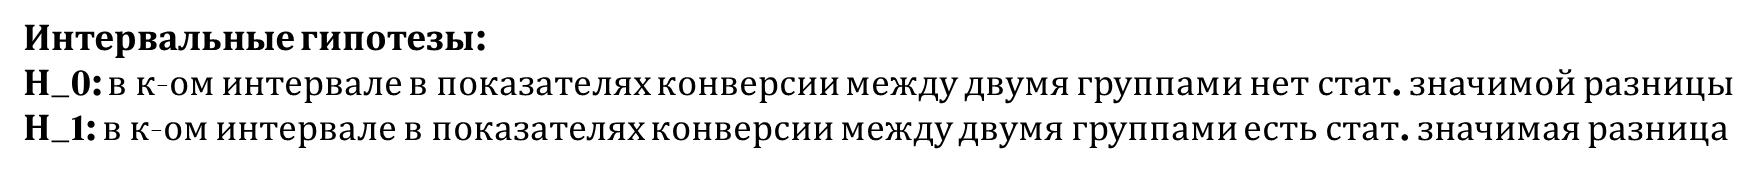

In [ ]:
import statsmodels.stats.proportion as proportion

z_score =  []
p_values = []
tracker = 0
for i in range(len(new_control)):
#выполнение Z-теста для двух пропорций
#counts - массив числа конверсий, nobs - массив общего числа пользователей
  z_stat, p_value = proportion.proportions_ztest(
      count=[new_control.iloc[i]['conversions'], new_treatment.iloc[i]['conversions']],
      nobs=[new_control.iloc[i]['total_users'], new_treatment.iloc[i]['total_users']],
      alternative='two-sided'  # проверяем на неравенство (может быть 'smaller' или 'larger')
    )
  if p_value >= 0.04:
    tracker +=1
  z_score.append(z_stat)
  p_values.append(p_value)


In [ ]:
print(tracker)

1020


In [ ]:
print(np.mean(z_score))
print(np.mean(p_values))

0.04248565328606549
0.50422992608439


Получаем, что среднее p_value ~ 0.504 > 0.04. Значит принимаен нулевую гипотезу, то есть новая версия лендинга не имеет стат. значимое влияние на конверсию

In [ ]:
z_score = pd.Series(z_score)
p_values = pd.Series(p_values)

<Axes: ylabel='Count'>

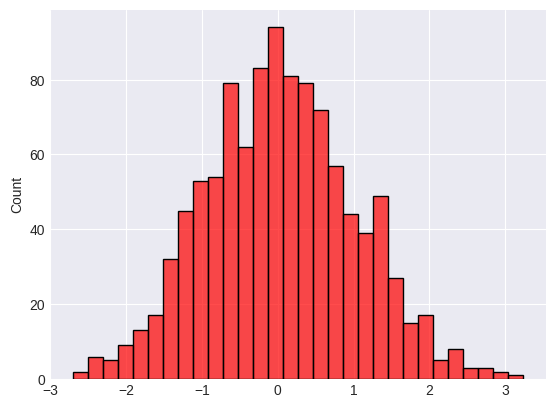

In [ ]:
sns.histplot(z_score, bins=30, alpha=0.7, label='Распределение p_values', color='red')

<Axes: ylabel='Count'>

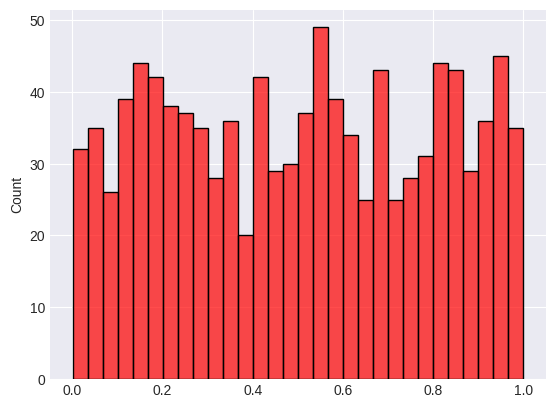

In [ ]:
sns.histplot(p_values, bins=30, alpha=0.7, label='Распределение p_values', color='red')

<Axes: ylabel='Count'>

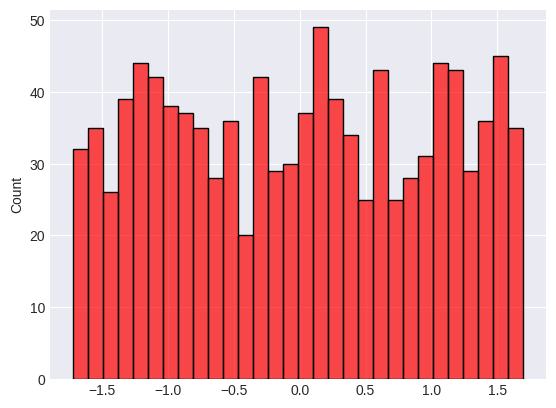

In [ ]:
#стандарьтизирование
sns.histplot((p_values - np.mean(p_values))/ np.std(p_values), bins=30, alpha=0.7, label='Распределение p_values', color='red')

## Проверка корректности поинтервального тестирования с помощью анализа распределения z-score

Проверим z_score на нормально с помощью теста Колмогорова-Смирнова

Если нормальность с центром в нуле не отвергается и дисперсия близка к 1, это подтверждает корректность z‑теста и отсутствие систематического сдвига между группами по интервалам.

Что нам даст нормальность???

1. центр в нуле доказывает, что между группами нет фоновых различий
2. Дисперсия -> 1 означает, что тестирование учитывает шум в данных
3. нормальность z-score подтверждает валидность результатов. Нормальность распределения z-score означает, что закон больших чисел работает корректно и распределение выборочных средних сходится к нормальному
4. Отсутствие экстремальных выбросов и тяжелых хвостов

Н_0: Распределение z_score сводится к N(0,1)

Н_1: Распределение z_score не сводится к N(0,1)

сначала построим Q-Q plot

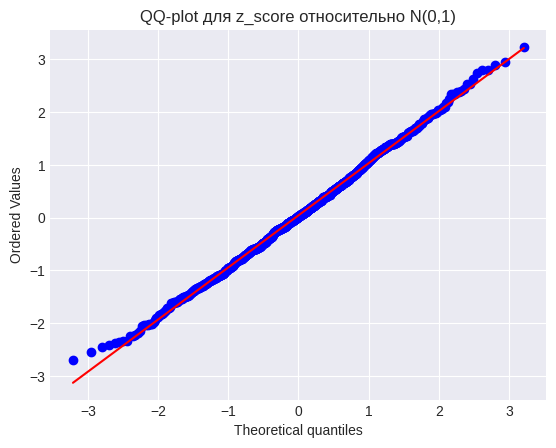

In [ ]:
z_score = np.array(z_score)
stats.probplot(z_score, dist="norm", sparams=(0, 1), plot=plt)
plt.title("QQ-plot для z_score относительно N(0,1)")
plt.show()

проверяем нормальность через тест Шарипо-Уилка и Колмогорова-Смирнова, но уже относительно N(0,1)

In [ ]:
#тест Шапиро–Уилка (нормальность в целом)
stat_sh, p_sh = stats.shapiro(z_score)
print(f"Shapiro-Wilk: stat={stat_sh:.4f}, p-value={p_sh:.4f}")
#K-S тест относительно N(0,1)
stat_ks, p_ks = stats.kstest(z_score, 'norm', args=(0, 1))
print(f"Kolmogorov–Smirnov: stat={stat_ks:.4f}, p-value={p_ks:.4f}")

Shapiro-Wilk: stat=0.9980, p-value=0.2468
Kolmogorov–Smirnov: stat=0.0260, p-value=0.4640


оба p-value > 0.04, значит нет оснований отвергать гипотезу, что z_score распределены приблеженно как N(0,1)

In [ ]:
print(np.mean(z_score))
print(np.var(z_score))

0.04248565328606549
0.9734073875361534


- имеем sharipo_pvalue = 0.24 > 0.04, K-S относительно N(0,1) => нет оснований отвергать гипотезу, что z_score распределён аппроксимированно N(0,1)
- mean[z_score] -> 0
- VAR[z_score] -> 1

следовательно можем сделать вывод, что совокупность тестов принимает первоначальную Н_0: новая версия лендинга не имеет стат. значимое влияние на на конверсию


## Оценка эффекта с помощью доверительный интервов

In [ ]:
totall = new_control.merge(new_treatment, left_index=True, right_index=True, how='left')

In [ ]:
totall.head()

,timestamp_x,total_users_x,conversions_x,CR_x,timestamp_y,total_users_y,conversions_y,CR_y
0,2025-01-02 13:42:15.234051,144,17,0.118056,2025-01-02 13:42:05.378582,146,16,0.109589
1,2025-01-02 14:12:15.234051,139,27,0.194245,2025-01-02 14:12:05.378582,129,14,0.108527
2,2025-01-02 14:42:15.234051,125,12,0.096000,2025-01-02 14:42:05.378582,156,14,0.089744
3,2025-01-02 15:12:15.234051,116,15,0.129310,2025-01-02 15:12:05.378582,141,16,0.113475
4,2025-01-02 15:42:15.234051,128,18,0.140625,2025-01-02 15:42:05.378582,139,18,0.129496


рассматривать эффекты по интервалам как обычную выборку чисел и построить для их среднего доверительный интервал. Это даёт ещё один взгляд на глобальную Н_0:«в среднем по интервалам эффекта нет»

Для разности долей CR, delta_i, часто используют нормальную аппроксимацию не потому, что сама доля «нормальна», а потому что при большом размере выборки действует ЦПТ. Так как выборки достаточно большое (n=1056), по ЦПТ разность апроксимируется, как нормально распределённая случайная величина

Такой подход особенно полезен диагностически: если распределение p‑values выглядит странно, но mean(delta_i) близко к 0 и его ДИ узкий и включает 0, это аргумент, что даже если какие‑то статистические предпосылки нарушены, средний практический эффект очень мал.

Близко к 0 и его ДИ узкий и включает 0, тк Н_0 устанавливается, как: "отсутсвие стат. значимой разницы между контрольной и тритмент группой", те их разница стремится 0.

Доверительный интервал задаёт диапазон значений параметра, которые «не противоречат» данным на заданном уровне доверия. Поэтому смотрим не только на "попадения 0 в интервал", но и на ширину.

Так как alpha = 0.04 строим 96%-Й ДИ.

Частотная формулировка: если бесконечно повторять эксперимент и каждый раз строить 96%-й интервал по одной и той же процедурe, то примерно в 96% случаев такие интервалы будут содержать истинное значение параметра, а в 4% — нет.

In [ ]:
totall['delta'] = totall['CR_x'] - totall['CR_y']

In [ ]:
from scipy.stats import norm
delta = np.array(totall['delta'])
m = delta.mean()
s = np.std(delta)
k = len(delta)

se_mean = s / np.sqrt(k) #стд ошибка
z = norm.ppf(1 - 0.04/2) #возвращает квантиль стандартного нормального распределения

ci_low  = m - z * se_mean
ci_high = m + z * se_mean

print(f"mean delta = {m:.5f}")
print(f"96% CI for mean delta = [{ci_low:.5f}, {ci_high:.5f}]")


mean delta = 0.00177
96% CI for mean delta = [-0.00066, 0.00421]


- ДИ = [-0.00066, 0.00421]
- mean delta = 0.00177 --> 0


Таким образом не имеем достаточно данных, чтобы опровергунть Н_0, а также, если эффект и есть, он настолько мал, что практически неважен.​

Итог: принимает Н_0

## Beta-Binomial distribution

В теории вероятностей и статистике бета-биномиальное распределение — это семейство дискретных вероятностных распределений на конечном носителе неотрицательных целых чисел, возникающих, когда вероятность успеха в каждом из фиксированного или известного числа испытаний Бернулли либо неизвестна, либо случайна. Бета-биномиальное распределение — это биномиальное распределение, в котором вероятность успеха в каждом из n испытаний не фиксирована, а выбирается случайным образом из бета-распределения. Оно часто используется в байесовской статистике, эмпирических байесовских методах и классической статистике для выявления избыточной дисперсии в данных с биномиальным распределением.

{\displaystyle {\begin{aligned}f(x\mid n,\alpha ,\beta )&=\int _{0}^{1}\mathrm {Bin} (x|n,p)\mathrm {Beta} (p\mid \alpha ,\beta )\,dp\\[6pt]&={n \choose x}{\frac {1}{\mathrm {B} (\alpha ,\beta )}}\int _{0}^{1}p^{x+\alpha -1}(1-p)^{n-x+\beta -1}\,dp\\[6pt]&={n \choose x}{\frac {\mathrm {B} (x+\alpha ,n-x+\beta )}{\mathrm {B} (\alpha ,\beta )}}.\end{aligned}}}

Новые знания (Posterior) ∝ Старые знания (Prior) × Новые данные (Likelihood)

1. Prior - априорное распределение, это наше гипотеза, то, что мы думали до эксперимента E[p] = 0.5/(0.5 + 0.5) ≈ 50%
2. Likelihood (Правдоподобие), что показывают экспериментальные данные. Test: 180 конверсий из 2000 показов (9.0%) Для каждой возможной конверсии p мы спрашиваем:
"Насколько вероятно получить такие данные, если истинная конверсия = p?"
Likelihood(p) = C(2000, 180) × p¹⁸⁰ × (1-p)¹⁸²⁰. Likelihood - это "вес" данных для каждой гипотезы.
3. Posterior (Апостериорное распределение), что мы думаем ПОСЛЕ эксперимента

Для конверсии есть удобное свойство:

Если Prior = Beta(α, β) и данные = Биномиальные(k успехов, n испытаний), то:

Posterior = Beta(α + k, β + n - k)

Зачем генерировать случайные значения?
Мы не можем аналитически сравнить два Beta распределения, но можем:

1. Сгенерировать много (100k) случайных значений из каждого распределения

2. Сравнить их попарно

3. Получить эмпирические оценки вероятностей

Это Monte Carlo метод - вместо сложной математики используем вычислительную мощность.

In [ ]:
new_control = count_users_per_t_minutes(df[df['group'] == 'control'], 30)
new_treatment = count_users_per_t_minutes(df[df['group'] == 'treatment'], 30)


#Суммируем по группам
control_total = new_control['total_users'].sum()
control_conversions = new_control['conversions'].sum()

treatment_total = new_treatment['total_users'].sum()
treatment_conversions = new_treatment['conversions'].sum()
print(f"Control: {control_conversions}/{control_total} = {control_conversions/control_total:.2%}")
print(f"treatment: {treatment_conversions}/{treatment_total} = {treatment_conversions/treatment_total:.2%}")

Control: 17375/144319 = 12.04%
treatment: 17130/144316 = 11.87%


Мы будем использовать Jeffreys prior: aplha_prior = 0.5, beta_prior = 0.5 -
является стандартом для A/B тестирования и не вносит
субъективных предположений.

In [116]:
def analyze_ab_test_beta_binomial(control, treatment):
    control_data = control.copy()
    treatment_data = treatment.copy()

    #Bayesian анализ
    #Prior: Beta(0.5, 0.5) ~ ожидаем конверсию = 0.5 / (0.5 + 0.5) = 50%, но с низким уровнем уверенности
    alpha_prior, beta_prior = 0.5, 0.5

    #Posterior для control
    alpha_control = alpha_prior + control_conversions
    beta_control = beta_prior + control_total - control_conversions # control_non_conversions = control_total - control_conversions

    #Posterior для treatment
    alpha_treatment = alpha_prior + treatment_conversions
    beta_treatment = beta_prior + treatment_total - treatment_conversions # treatment_non_conversions = treatment_total - treatment_conversions

    #генерация 100тыс сэмплов конверсионных вероятностей θ из постериоров каждой группы.
    #эмпирические распределения P(θ|data)
    n_samples = 100000
    p_control_samples = np.random.beta(alpha_control, beta_control, n_samples)
    p_treatment_samples = np.random.beta(alpha_treatment, beta_treatment, n_samples)

    #абсолютные разности θ_treatment - θ_control для каждой пары сэмплов
    diff_samples = p_treatment_samples - p_control_samples

    #доля случаев θ_treatment > θ_control = P(θ_t > θ_c | data).
    prob_treatment_better = (p_treatment_samples > p_control_samples).mean()
    #средняя разность = E[θ_t - θ_c | data].
    expected_gain = diff_samples.mean()

    print(f"Bayesian результаты:")
    print(f"P(treatment лучше Control) = {prob_treatment_better:.1%}")
    print(f"Ожидаемый прирост = {expected_gain:.3%}")
    print(f"96% HDI для прироста: [{np.percentile(diff_samples, 2):.3%}, "
          f"{np.percentile(diff_samples, 98):.3%}]")

In [117]:
analyze_ab_test_beta_binomial(new_control, new_treatment)

Bayesian результаты:
P(treatment лучше Control) = 7.8%
Ожидаемый прирост = -0.171%
96% HDI для прироста: [-0.419%, 0.078%]


Вероятность, что экспериментальная выборка лучше, чем контрольная составляет только 7.8%. Это означает, что вероятность ухудшений при принятии гипотезы составит аж 92.2%. Стоит отклонить альтернативную гипотезу, и не вводить изменения, так как вероятнее всего они **хуже**, чем исходны вариант.

# Вывод и советы для бизнеса

1. Статистический вывод:
* Нет статистически значимой разницы между группами
* Экспериментальная группа НЕ лучше Контрольной группой (с вероятностью 89.2%)
* Разница очень мала (0.15%) и не имеет практической значимости

2. Бизнес-вывод:
* Изменение не работает в лучшую сторону
* Риск внедрения: возможна небольшая потеря конверсии
* Рекомендация: Оставить текущий вариант (Control)

3. Почему стоит остановить тест:
* Большая выборка: Уже ~150K пользователей в каждой группе
* Высокая мощность: Тест способен детектировать даже небольшие эффекты
* Ясный результат: Вероятность улучшения всего 10.8%
* Закон убывающей отдачи: Дальнейший сбор данных вряд ли изменит вывод

Длительность эксперимента

Длительность (дни) = (Общий размер выборки для А и B) / (Среднее количество посетителей/конверсий в день)

In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
mean_per_day = res.groupby('day_of_a_period').size().mean()
mean_per_day

In [ ]:
duration = data.shape[0] / mean_per_day
duration